# Downloading the datasets

In [1]:
!pip install opendatasets
!pip install split-folders

In [3]:
import opendatasets as op

url = 'https://www.kaggle.com/datasets/arjuntejaswi/plant-village'

op.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bmwnext100
Your Kaggle Key: ··········


100%|██████████| 329M/329M [00:19<00:00, 18.0MB/s]


Splitting the folders as Train set and Test set

In [4]:
import os

os.makedirs('PlantVillage')

In [5]:
import shutil

src = '/content/plant-village/PlantVillage/Tomato_Bacterial_spot'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Early_blight'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Late_blight'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Leaf_Mold'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Septoria_leaf_spot'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato__Target_Spot'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato__Tomato_mosaic_virus'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_healthy'
des = '/content/PlantVillage'
shutil.move(src, des)

'/content/PlantVillage/Tomato_healthy'

In [6]:
!split_folders --output dataset --ratio 0.7 0.1 0.2 -- PlantVillage

Copying files: 16012 files [00:02, 6240.75 files/s]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

# Dataset class distribution

0 - Tomato__Target_Spot
1 - Tomato_Early_blight
2 - Tomato_Leaf_Mold
3 - Tomato_Bacterial_spot
4 - Tomato_Late_blight
5 - Tomato_Septoria_leaf_spot
6 - Tomato_healthy
7 - Tomato_Spider_mites_Two_spotted_spider_mite
8 - Tomato__Tomato_mosaic_virus
9 - Tomato__Tomato_YellowLeaf__Curl_Virus


<ipython-input-22-890746463468>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lbl_indexs, y=train_counts, palette='magma')


<Axes: >

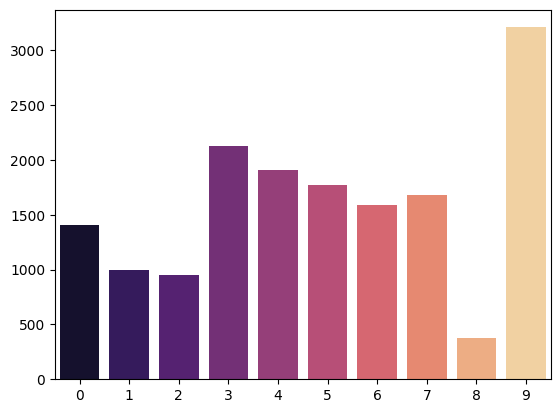

In [22]:
lbls = os.listdir("PlantVillage")

lbl_indexs = []
train_counts =[]

for label in lbls:

    folder = os.path.join('PlantVillage', label)
    train_counts.append(len(os.listdir(folder)))

train_counts

index = 0

for clable in lbls:
    lbl_indexs.append(index)
    print(f'{index} - {clable}')
    index = index + 1


sns.barplot(x=lbl_indexs, y=train_counts, palette='magma')


**train data set**

In [8]:
# Data augmentation
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=10,
                              horizontal_flip=True
                              )

In [9]:
train_gen = data_gen.flow_from_directory('/content/dataset/train',
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )

Found 11203 images belonging to 10 classes.


**test data set**

In [10]:
validation_gen = data_gen.flow_from_directory('/content/dataset/val',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical'
                                                    )

Found 1597 images belonging to 10 classes.


In [11]:
test_gen = data_gen.flow_from_directory('/content/dataset/test',
                                                target_size=(256, 256),
                                                batch_size=32,
                                                class_mode='categorical'
                                                    )


Found 3211 images belonging to 10 classes.


# Creating the neural network

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [16]:
history = model.fit(train_gen,
          validation_data=validation_gen,
          epochs=10,
          steps_per_epoch=len(train_gen),
          validation_steps=len(validation_gen),
          verbose=1)

Epoch 1/10
351/351 [==============================] - 217s 595ms/step - loss: 1.7350 - accuracy: 0.3861 - val_loss: 1.2853 - val_accuracy: 0.5454
Epoch 2/10
351/351 [==============================] - 204s 581ms/step - loss: 1.0258 - accuracy: 0.6441 - val_loss: 0.9188 - val_accuracy: 0.6788
Epoch 3/10
351/351 [==============================] - 204s 582ms/step - loss: 0.7232 - accuracy: 0.7544 - val_loss: 0.6440 - val_accuracy: 0.7583
Epoch 4/10
351/351 [==============================] - 223s 635ms/step - loss: 0.5642 - accuracy: 0.8034 - val_loss: 0.4914 - val_accuracy: 0.8378
Epoch 5/10
351/351 [==============================] - 207s 590ms/step - loss: 0.4728 - accuracy: 0.8313 - val_loss: 0.6173 - val_accuracy: 0.7946
Epoch 6/10
351/351 [==============================] - 222s 634ms/step - loss: 0.3963 - accuracy: 0.8597 - val_loss: 0.3773 - val_accuracy: 0.8622
Epoch 7/10
351/351 [==============================] - 224s 638ms/step - loss: 0.3649 - accuracy: 0.8712 - val_loss: 0.2888 -

# Evaluating Loss and Accuracy

In [17]:
loss, accuracy = model.evaluate(test_generator)

101/101 [==============================] - 53s 525ms/step - loss: 0.3429 - accuracy: 0.8922


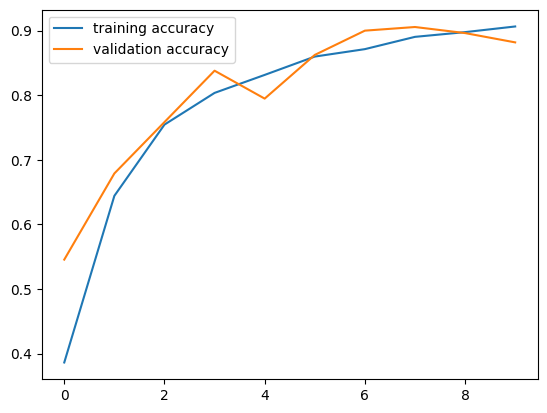

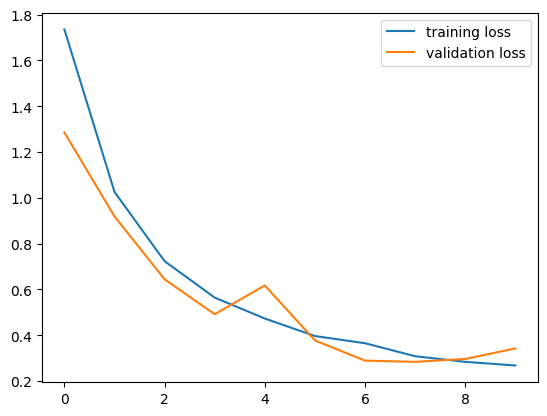

In [18]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [19]:
model.save('tomato_disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing a prediction

In [20]:
from keras.utils import load_img, img_to_array

#Image paht
img_path = '/content/PlantVillage/Tomato_Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG'

# load image
img = load_img(img_path, target_size=(256, 256))

# convert image into areay
img_arr = img_to_array(img)

# Normalize pixel values to [0, 1]
img = img_arr/255

# Add batch dimension
img = np.expand_dims(img, axis=0)

prediction  = model.predict(img)

class_labels = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
                'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
                'Tomato_healthy']

pred_index = np.argmax(prediction)
confidence = prediction[0][pred_index]

predicted_class = class_labels[pred_index]

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2%}")

1/1 [==============================] - 1s 500ms/step
Predicted class: Tomato_Early_blight
Confidence: 90.71%
